In [1]:
from pyomo.environ import *
import matplotlib.pyplot as plt
import os
import random

solverpath_exe = 'C:\\Users\\Yuri Muniz\\OneDrive\\Documentos\\solvers\\ipopt-win64\\ipopt'

# [The hostile brothers problem](http://yetanothermathprogrammingconsultant.blogspot.com/2015/01/the-hostile-brothers-problem-1.html)

For a $1\times 1$ square we can formulate the problem as

$$\min F(r) = r;$$
$$(x_i - x_j)^2 + (y_i - y_j)^2 \ge r^2 \,\,\forall \, i > j;$$
$$0 \le x_i,y_i \le 1 \,\,\forall \, i.$$

where $x_i$ and $y_i$ are the coordinates of each hostile brother ($i = 1,2,...,N$).

In [2]:
# Defining an abstract model that should be the same for any number of brothers (N)
model = AbstractModel()
model.N = Param(mutable=True)

# Defining set {1,2,...,N}
model.i = RangeSet(1,model.N)

# Must initialize the values in order to get a feasible solution
def initval(model,i):
    return random.uniform(0,1)

model.x = Var(model.i, bounds = (0,1), within = NonNegativeReals, initialize = initval)
model.y = Var(model.i, bounds = (0,1), within = NonNegativeReals, initialize = initval)

# Auxiliary variable (it is great to have a smooth objective function)
model.r = Var(within = NonNegativeReals)

# Constraint
def C1_rule(model, i, j):
    if i > j:
        return (model.x[i] - model.x[j])**2 + (model.y[i] - model.y[j])**2 >= model.r**2
    else:
        return Constraint.Skip

model.C1=Constraint(model.i, model.i, rule = C1_rule)

# Objective
model.f1=Objective(expr = model.r, sense = maximize)

# ipopt solver
opt = SolverFactory('ipopt', executable=solverpath_exe)

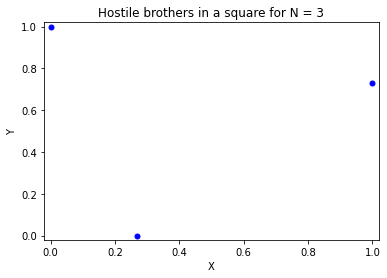

In [3]:
# Play with the number of brothers
model.N = 3
instance = model.create_instance()
results = opt.solve(instance)

# Plotting
X = [value(instance.x[i]) for i in instance.i]
Y = [value(instance.y[i]) for i in instance.i]

plt.scatter(X,Y,s=25,color='blue')
plt.xlim([-0.02,1.02])
plt.ylim([-0.02,1.02])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Hostile brothers in a square for N = '+str(value(instance.N)))
plt.show()

# Hostile brothers in a circle

For a circle of radius $1$ we can formulate the problem as

$$\min F(r) = r;$$
$$(x_i - x_j)^2 + (y_i - y_j)^2 \ge r^2 \,\,\forall \, i > j;$$
$$ x_i^2 + y_i^2 \le 1 \,\,\forall \, i.$$

where $x_i$ and $y_i$ are the coordinates of each hostile brother ($i = 1,2,...,N$).

In [4]:
# Defining an abstract model that should be the same for any number of brothers (N)
model = AbstractModel()
model.N = Param(mutable=True)

# Defining set {1,2,...,N}
model.i = RangeSet(1,model.N)

# Must initialize the values in order to get a feasible solution
def initval(model,i):
    return random.uniform(-1,1)

model.x = Var(model.i, bounds = (-1,1), within = Reals, initialize = initval)
model.y = Var(model.i, bounds = (-1,1), within = Reals, initialize = 0.1)

# Auxiliary variable (it is great to have a smooth objective function)
model.r = Var(within = NonNegativeReals)

# Constraint
def C1_rule(model, i, j):
    if i > j:
        return (model.x[i] - model.x[j])**2 + (model.y[i] - model.y[j])**2 >= model.r**2
    else:
        return Constraint.Skip

model.C1=Constraint(model.i, model.i, rule = C1_rule)

# Constraint
def C2_rule(model, i):
    return model.x[i]**2 + model.y[i]**2 <= 1

model.C2=Constraint(model.i, rule = C2_rule)

# Objective
model.f1=Objective(expr = model.r, sense = maximize)

# ipopt solver
opt = SolverFactory('ipopt', executable=solverpath_exe)

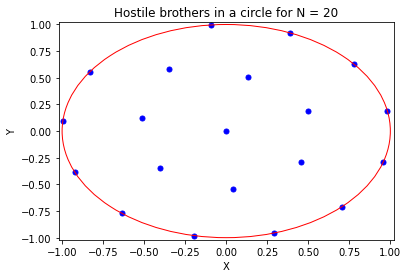

In [5]:
# Play with the number of brothers
model.N = 20
instance = model.create_instance()
results = opt.solve(instance)

# Plotting
X = [value(instance.x[i]) for i in instance.i]
Y = [value(instance.y[i]) for i in instance.i]

ax = plt.gca()
circle = plt.Circle((0,0),1, linestyle='-', fill=False, color='red')
ax.add_patch(circle)

plt.scatter(X,Y,s=25,color='blue')
plt.xlim([-1.02,1.02])
plt.ylim([-1.02,1.02])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Hostile brothers in a circle for N = '+str(value(instance.N)))
plt.show()